# COCO Image DataLoader Testing

## Imports

In [1]:
# Add Utils to path
import sys
sys.path.append('../Utils')  # Adds higher directory to python modules path.

# Utils
from constants import *
from datasets_generators import CocoDetection

# Pytorch
from torch.utils.data import DataLoader
from transformers import DetrImageProcessor
from torchvision.transforms.functional import to_pil_image

# Other
import matplotlib.pyplot as plt

c:\Users\ignac\anaconda3\envs\odm\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Data

In [2]:
# Transforms
image_processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")

# COCO Dataset
train_set = CocoDetection(image_directory_path=ALL_IMAGES,  annotation_file_path=TRAIN_COCO, image_processor=image_processor, )
val_set = CocoDetection(image_directory_path=ALL_IMAGES,  annotation_file_path=VAL_COCO, image_processor=image_processor)
test_set = CocoDetection(image_directory_path=ALL_IMAGES,  annotation_file_path=TEST_COCO, image_processor=image_processor)

# Collade function
def collate_fn(batch):
    pixel_values = [item[0] for item in batch]
    encoding = image_processor.pad(pixel_values, return_tensors="pt")
    labels = [item[1] for item in batch]
    return {
        'pixel_values': encoding['pixel_values'],
        'pixel_mask': encoding['pixel_mask'],
        'labels': labels
    }

# DataLoaders
TRAIN_DATALOADER = DataLoader(dataset=train_set, collate_fn=collate_fn, batch_size=32, shuffle=True)
VAL_DATALOADER = DataLoader(dataset=val_set, collate_fn=collate_fn, batch_size=32)
TEST_DATALOADER = DataLoader(dataset=test_set, collate_fn=collate_fn, batch_size=32)

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


In [3]:
batch = next(iter(TRAIN_DATALOADER))
print(batch['pixel_values'].shape)

torch.Size([32, 3, 700, 700])


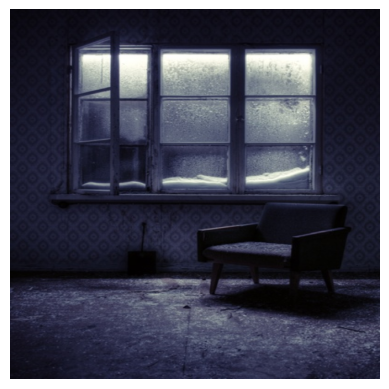

In [4]:
# get image
image_tensor = batch['pixel_values'][4]

image = to_pil_image(image_tensor)

# Plot the image
plt.imshow(image)  # If channels are the first dimension
# plt.imshow(image_array)  # If channels are the last dimension
plt.axis('off')  # Turn off axis labels
plt.show()